# E1 - Modelagem de Sistemas Dinâmicos (PME3380)

Resolução da primeira lista de exercícios com os códigos das simulações feitas a partir das equações obtidas.



## Configuração do Ambiente e Bibliotecas

Importação das principais biblitoecas que vão ser utilizadas no desenvolvimento da tarefa.

- Numpy para os cálculso de álgebra linear
- Matplotlib para a criação de gráficos
- Scipy para utilizar os métodos de integração numérica

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt

## Descrição do Problema

Trata-se de um pêndulo duplo constituído por duas barras esbeltas e homogêneas
$OP$ e $PQ$, de mesma massa por unidade de comprimento $\mu$. Neste
caso, as massas são diretamente proporcionais aos respectivos comprimentos,
ou seja, $𝑚1 = \mu 𝑙_1$ e $𝑚2 = \mu 𝑙_2$.


A partir disso, define-se um sistema de coordenadas para a solução:

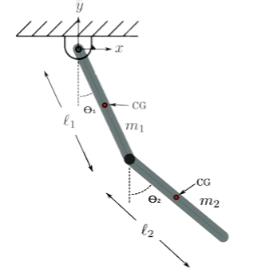

Em seguida, tem-se o diagrama de corpo livre:

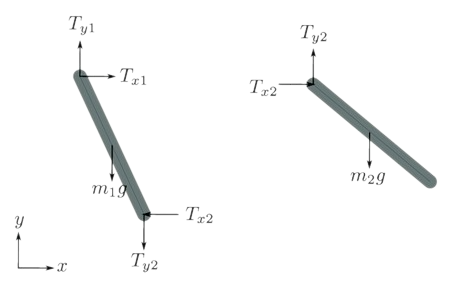

### Modelo não Linear

As equações do modelo não linear são as seguintes:

\begin{equation}
    \begin{aligned}
    \dot{x}_1 &= x_3 \\
    \dot{x}_2 &= x_4 \\
    \dot{x}_3 &= \frac{3}{\lambda}\left[\frac{2\lambda^2 \omega_p^2 \sin(\Theta_1) + 4\lambda \omega_p^2 \sin(\Theta_1) - 3\lambda \omega_p^2 \sin(\Theta_2)\cos(\Theta_1 - \Theta_2)}{-4\lambda + 9 \cos(\Theta_1 - \Theta_2)^2 - 12}\right] \\
& \quad + \frac{3}{\lambda}\left[ \frac{3\lambda \sin(\Theta_1 - \Theta_2)\cos(\Theta_1 - \Theta_2)\dot{\Theta_1^2} + 2\sin(\Theta_1 - \Theta_2) \dot{\Theta_2^2}}{-4\lambda + 9 \cos(\Theta_1 - \Theta_2)^2 - 12}\right]\\
    \dot{x}_4 &= 3\left[\frac{3\lambda^2 \omega_p^2 \sin(\Theta_1)\cos(\Theta_1 - \Theta_2) - 2\lambda^2\omega_p^2\sin(\Theta_2) + 2\lambda^2\sin(\Theta_1 - \Theta_2)\dot{\Theta_1^2}}{4\lambda - 9 \cos(\Theta_1 - \Theta_2)^2 + 12}\right] \\
&\quad + 3\left[ \frac{6\lambda \omega_p^2 \sin(\Theta_1)\cos(\Theta_1 - \Theta_2) - 6\lambda\omega_p^2 \sin(\Theta_2) + 6\lambda \sin(\Theta_1 - \Theta_2)\dot{\Theta_1^2}}{4\lambda - 9 \cos(\Theta_1 - \Theta_2)^2 + 12}\right] \\
&\quad + 3\left[ \frac{3\sin(\Theta_1 - \Theta_2)\cos(\Theta_1 - \Theta_2)\dot{\Theta_2^2}}{4\lambda - 9 \cos(\Theta_1 - \Theta_2)^2 + 12}\right]
    \end{aligned}
\end{equation}

In [ ]:
# Definindo as equações do modelo não-linear
def nonlinear_model(t, z):
    theta1, theta2, omega1, omega2 = z

    domega1dt =  3 * (2 * lmbda**2 * omega_p**2 * np.sin(theta1) + 4 * lmbda * omega_p**2 * np.sin(theta1)
                 - 3 * lmbda * omega_p**2 * np.sin(theta2) * np.cos(theta1 - theta2) + 2 * omega2**2 * np.sin(theta1 - theta2)
                 + 3 * lmbda * omega1**2 * np.sin(theta1 - theta2) * np.cos(theta1 - theta2))

    domega1dt /= lmbda * (-4*lmbda + 9 * np.cos(theta1 - theta2)**2 - 12)

    domega2dt = 3 * (3 * lmbda**2 * omega_p**2 * np.sin(theta1) * np.cos(theta1 - theta2)
                 - 2 * lmbda**2 * omega_p**2 * np.sin(theta2))

    domega2dt += 3 * (2 * lmbda**2 * np.sin(theta1 - theta2) * omega1**2
                  + 6 * lmbda * omega_p**2 * np.sin(theta1) * np.cos(theta1 - theta2)
                  - 6 * lmbda * omega_p**2 * np.sin(theta2))

    domega2dt += 3 * (6 * lmbda * np.sin(theta1 - theta2) * omega1**2
                  + 3 * np.sin(theta1 - theta2) * np.cos(theta1 - theta2) * omega2**2)

    domega2dt /= (4 * lmbda - 9 * np.cos(theta1 - theta2)**2 + 12)

    return [omega1, omega2, domega1dt, domega2dt]

### Modelo Linearizado (em relação ao equilíbrio estável trivial)

O modelo linearizado é o seguinte:

\begin{equation}
    \begin{aligned}
    \dot{x}_1 &= x_3 \\
    \dot{x}_2 &= x_4 \\
    \dot{x}_3 &= \frac{9w_p^2\cdot x_2 -(6w_p^2\lambda + 12w_p^2)\cdot x_1}{3+4\lambda} \\
    \dot{x}_4 &= \frac{(9w_p^2\lambda^2+18w_p^2\lambda)\cdot x_1 - (18w_p^2\lambda+6w_p^2\lambda^2)\cdot x_2 }{3+4\lambda}
    \end{aligned}
\end{equation}

Com

In [ ]:
# Definindo equacoes do modelo linear
def linear_model(t, z):
    theta1, theta2, omega1, omega2 = z

    domega1dt = (9 * omega_p**2 * theta2 - 6 * omega_p**2 * lmbda * theta1 - 12 * omega_p**2 * theta1)

    domega1dt /= (3 + 4 * lmbda)

    domega2dt = (9 * omega_p**2 * lmbda**2 * theta1 + 18 * omega_p**2 * lmbda * theta1
                 - 18 * omega_p**2 * lmbda * theta2 - 6 * omega_p**2 * lmbda**2 * theta2)

    domega2dt /= (3 + 4 * lmbda)

    return [omega1, omega2, domega1dt, domega2dt]

## Cenário C1



### Condições Iniciais

A fim de perceber grande semelhança entre os modelos, forma escolhidas condições iniciais próximas da região de quilíbrio, com uma velocidade angular de saída baixa.

In [ ]:
# Parâmetros do sistema
lmbda = 1.85  # Parâmetro lambda
omega_p = np.sqrt(9.81 / lmbda)  # Frequência angular de pequenas oscilações

# Condições iniciais para o cenário C1
theta1_0 = 0
theta2_0 = 0
omega1_0 = 0
omega2_0 = 1
z0 = [theta1_0, theta2_0, omega1_0, omega2_0]

### Integrações

In [ ]:
# Tempo de simulação
t_span = [0, 10]  # de 0 a 10 segundos

# Realize a integração usando solve_ivp (M1) para o modelo não-linear
sol_nl_m1 = solve_ivp(nonlinear_model, t_span, z0, method='RK23', t_eval=np.linspace(t_span[0], t_span[1], 1000))
sol_l_m1 = solve_ivp(linear_model, t_span, z0, method='RK23', t_eval=np.linspace(t_span[0], t_span[1], 1000))

sol_nl_m2 = solve_ivp(nonlinear_model, t_span, z0, method='DOP853', t_eval=np.linspace(t_span[0], t_span[1], 1000))
sol_l_m2 = solve_ivp(linear_model, t_span, z0, method='DOP853', t_eval=np.linspace(t_span[0], t_span[1], 1000))

### Resultados

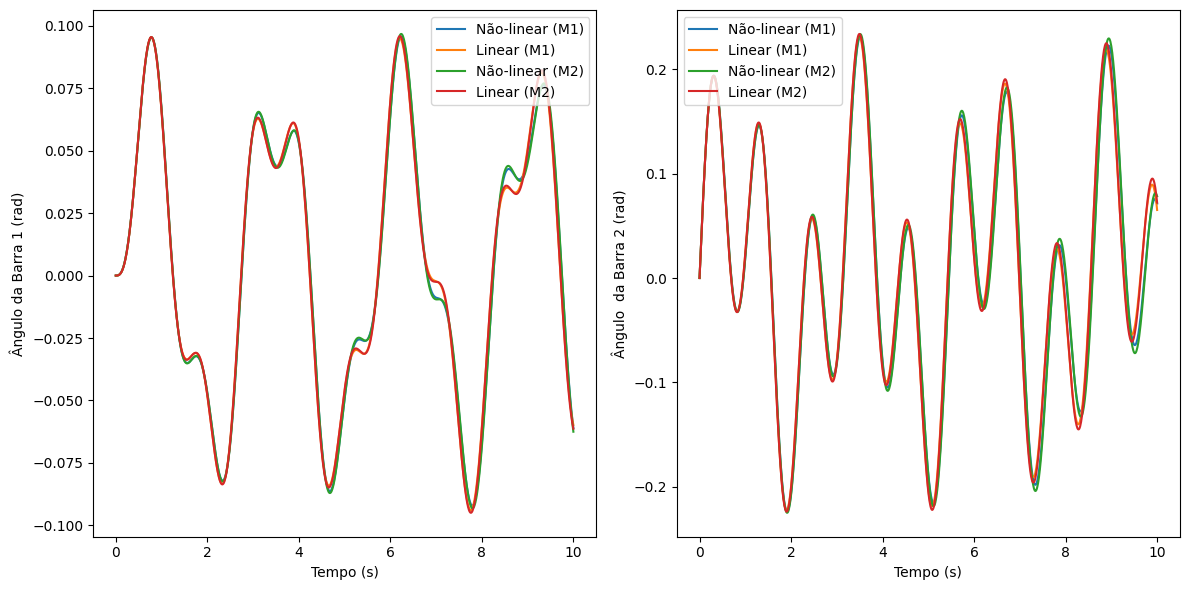

In [ ]:
# Plot dos resultados para o cenário C1
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol_nl_m1.t, sol_nl_m1.y[0], label='Não-linear (M1)')
plt.plot(sol_l_m1.t, sol_l_m1.y[0], label='Linear (M1)')
plt.plot(sol_nl_m2.t, sol_nl_m2.y[0], label='Não-linear (M2)')
plt.plot(sol_l_m2.t, sol_l_m2.y[0], label='Linear (M2)')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo da Barra 1 (rad)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sol_nl_m1.t, sol_nl_m1.y[1], label='Não-linear (M1)')
plt.plot(sol_l_m1.t, sol_l_m1.y[1], label='Linear (M1)')
plt.plot(sol_nl_m2.t, sol_nl_m2.y[1], label='Não-linear (M2)')
plt.plot(sol_l_m2.t, sol_l_m2.y[1], label='Linear (M2)')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo  da Barra 2 (rad)')
plt.legend()

plt.tight_layout()
plt.show()

## Cenário C2

Aqui, o cenário escolhido se refere a condições iniciais muito diferentes do equilíbrio e uma velocidade angular inicil de saída muito maior.

In [ ]:
# Condições iniciais para o cenário C1
theta1_0 = np.pi/6
theta2_0 = np.pi/6
omega1_0 = 0
omega2_0 = 8
z0 = [theta1_0, theta2_0, omega1_0, omega2_0]

### Integrações

In [ ]:
# Tempo de simulação
t_span = [0, 10]  # de 0 a 10 segundos

# Realize a integração usando solve_ivp (M1) para o modelo não-linear
sol_nl_m1 = solve_ivp(nonlinear_model, t_span, z0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], 1000))
sol_l_m1 = solve_ivp(linear_model, t_span, z0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], 1000))

sol_nl_m2 = solve_ivp(nonlinear_model, t_span, z0, method='DOP853', t_eval=np.linspace(t_span[0], t_span[1], 1000))
sol_l_m2 = solve_ivp(linear_model, t_span, z0, method='DOP853', t_eval=np.linspace(t_span[0], t_span[1], 1000))

### Resultados

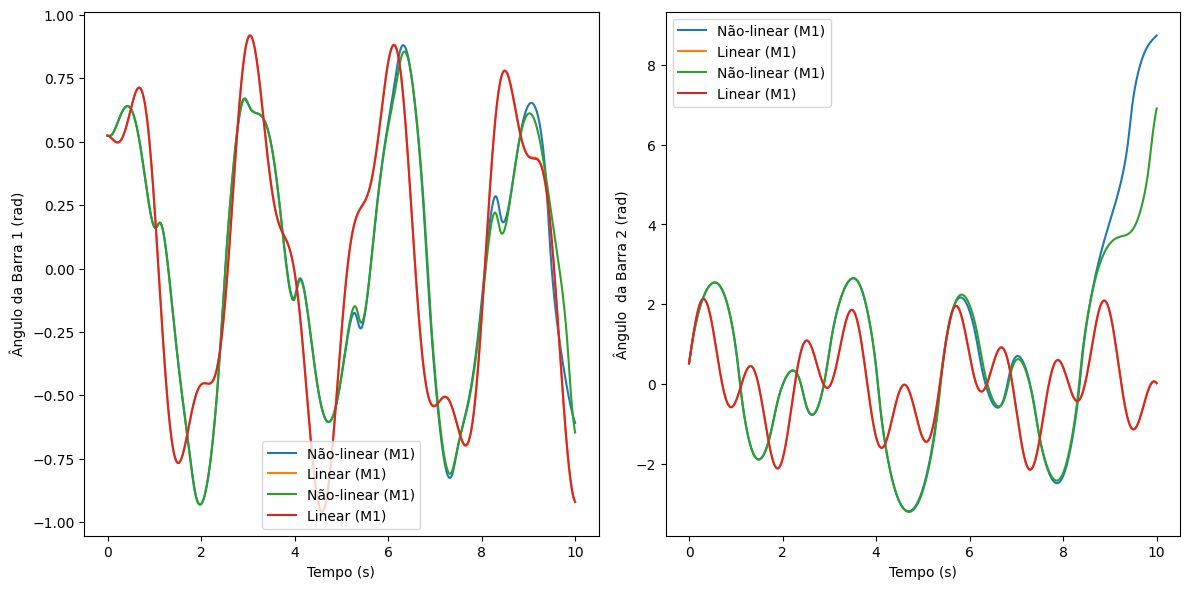

In [ ]:
# Plot dos resultados para o cenário C1
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol_nl_m1.t, sol_nl_m1.y[0], label='Não-linear (M1)')
plt.plot(sol_l_m1.t, sol_l_m1.y[0], label='Linear (M1)')
plt.plot(sol_nl_m2.t, sol_nl_m2.y[0], label='Não-linear (M1)')
plt.plot(sol_l_m2.t, sol_l_m2.y[0], label='Linear (M1)')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo da Barra 1 (rad)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sol_nl_m1.t, sol_nl_m1.y[1], label='Não-linear (M1)')
plt.plot(sol_l_m1.t, sol_l_m1.y[1], label='Linear (M1)')
plt.plot(sol_nl_m2.t, sol_nl_m2.y[1], label='Não-linear (M1)')
plt.plot(sol_l_m2.t, sol_l_m2.y[1], label='Linear (M1)')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo  da Barra 2 (rad)')
plt.legend()

plt.tight_layout()
plt.show()

### Energia Mecânica do Sistema

A energia mecânica total do sistema (ajustada por uma constante) é dada por (dedução e explicação no reatório):

$$
  E = \frac{\lambda^2}{2}\left(1 - cos(\theta_1)\right) + \lambda \left(1- cos(\theta_1) \right) + \frac{1}{2} \left(1 -  cos(\theta_2) \right) + \frac{1}{6} \lambda^3 \dot{\Theta_1^2} + \frac{1}{6}\dot{\Theta_2^2} + \frac{1}{2} \left[\lambda^2\dot{\Theta_1^2} + \lambda\dot{\Theta_1}\dot{\Theta_2}  cos \left(\Theta_1 - \Theta_2 \right)\right]
$$

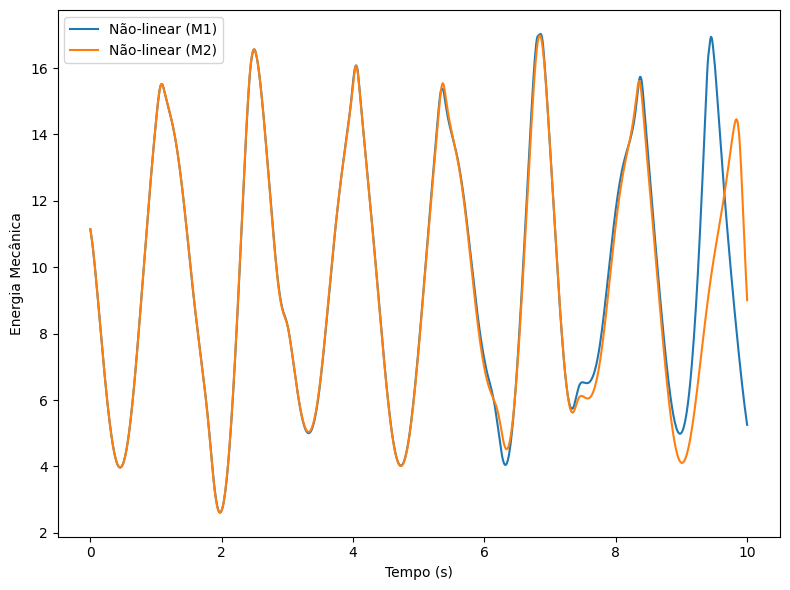

In [ ]:
# Constante lambda
lmbda = 1.85

# Calcular a energia mecânica para o modelo não linear (M1)
E_nl_m1 = (lmbda**2 / 2) * (1 - np.cos(sol_nl_m1.y[0])) + lmbda * (1 - np.cos(sol_nl_m1.y[1])) + 0.5 * (1 - np.cos(sol_nl_m1.y[2])) + (1/6) * lmbda**3 * sol_nl_m1.y[2]**2 + (1/6) * sol_nl_m1.y[3]**2 + 0.5 * (lmbda**2 * sol_nl_m1.y[2]**2 + lmbda * sol_nl_m1.y[2] * sol_nl_m1.y[3] * np.cos(sol_nl_m1.y[0] - sol_nl_m1.y[1]))


# Calcular a energia mecânica para o modelo não linear (M2)
E_nl_m2 = (lmbda**2 / 2) * (1 - np.cos(sol_nl_m2.y[0])) + lmbda * (1 - np.cos(sol_nl_m2.y[1])) + 0.5 * (1 - np.cos(sol_nl_m2.y[2])) + (1/6) * lmbda**3 * sol_nl_m2.y[2]**2 + (1/6) * sol_nl_m2.y[3]**2 + 0.5 * (lmbda**2 * sol_nl_m2.y[2]**2 + lmbda * sol_nl_m2.y[2] * sol_nl_m2.y[3] * np.cos(sol_nl_m2.y[0] - sol_nl_m2.y[1]))

# Plot da energia mecânica ao longo do tempo
plt.figure(figsize=(8, 6))
plt.plot(sol_nl_m1.t, E_nl_m1, label='Não-linear (M1)')
plt.plot(sol_nl_m2.t, E_nl_m2, label='Não-linear (M2)')
plt.xlabel('Tempo (s)')
plt.ylabel('Energia Mecânica')
plt.legend()
plt.tight_layout()
plt.show()